# Image Classification using CIFAR-10 Dataset

This employs a CNN model for image classification on the CIFAR-10 dataset using TensorFlow/Keras. This dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. This dataset is divided into 50,000 training images and 10,000 test images.


In [11]:
# Import  libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Load dataset and preprocssing 

In [12]:
# Load CIFAR-10 dataset from keras
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [13]:
# Normalize  all pixel values in between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Display an Image

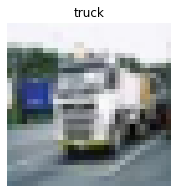

In [7]:
# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Choose an index to display
index = 1000  # Change this to plot different images

# Plot the image
plt.figure(figsize=(3,3))
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])
plt.axis('off')
plt.show()

Model Architecture

In [14]:
# Define the CNN model architecture
model = models.Sequential([

    # This is the first convolution
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),

    # The second convolution
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # The third convolution
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    layers.Flatten(),
    layers.Dropout(0.5),

    # 512 neuron hidden layer
    layers.Dense(512, activation='relu'),

    # Output layer with Softmax activation.
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 256)       

Compile the Model

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the Model

In [16]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


c:\Users\User\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 85s 52ms/step - loss: 1.5483 - accuracy: 0.4288 - val_loss: 1.1904 - val_accuracy: 0.5790
Epoch 2/10
1563/1563 [==============================] - 85s 55ms/step - loss: 1.1719 - accuracy: 0.5820 - val_loss: 1.0005 - val_accuracy: 0.6469
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0348 - accuracy: 0.6355 - val_loss: 0.9174 - val_accuracy: 0.6753
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.9501 - accuracy: 0.6646 - val_loss: 0.8600 - val_accuracy: 0.6975
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8822 - accuracy: 0.6918 - val_loss: 0.8271 - val_accuracy: 0.7106
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8297 - accuracy: 0.7081 - val_loss: 0.8326 - val_accuracy: 0.7128
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7989 - accuracy: 0.7189 - val_loss: 0.7711 - val_accura

Model Evaluation

313/313 [==============================] - 5s 17ms/step - loss: 0.7549 - accuracy: 0.7377
Test accuracy: 0.7376999855041504


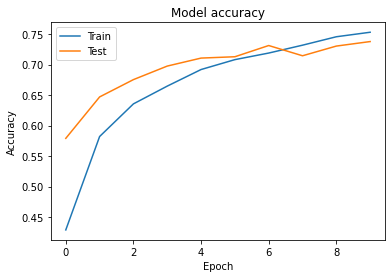

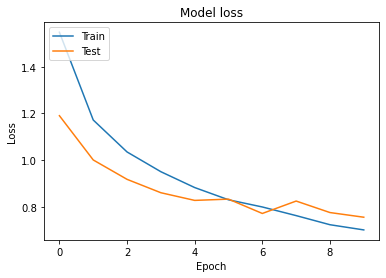

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()